In [121]:
import os
from google.colab import drive

drive.mount('/drive')
os.chdir('/drive/My Drive/UFAL/AM/Trabalho/Parte 2')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---


## Attributes Information:

    age - age in years // Age
    sex - (0 = male; 1 = female) // Sex
    cp - chest pain type // ChessPain
    trestbps - resting blood pressure (in mm Hg on admission to the hospital) // BloodPress
    chol - serum cholestoral in mg/dl // SerumChol
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) // FastBloodSugar
    restecg - resting electrocardiographic results // ElectroCardioRest
    thalach - maximum heart rate achieved // MaxHeartRate
    exang - exercise induced angina (1 = yes; 0 = no) // Angina
    oldpeak - ST depression induced by exercise relative to rest // STDepression
    slope - the slope of the peak exercise ST segment // STSlope
    ca - number of major vessels (0-3) colored by flourosopy // NumberMajorVessels
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect // Thalassemia
    target - have disease or not (1=yes, 0=no) // Disease

### References

https://www.kaggle.com/ronitf/heart-disease-uci/home  
https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning

## Load dataset

In [46]:
dataset = pd.read_csv("dataset/heart.csv")

In [47]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
dataset.columns = ["Age", "Sex", "ChessPain", "BloodPress", "SerumChol", "FastBloodSugar", "ElectroCardioRest", "MaxHeartRate",
                  "Angina", "STDepression", "STSlope", "NumberMajorVessels", "Thalassemia", "Disease"]

In [49]:
dataset.head()

,Age,Sex,ChessPain,BloodPress,SerumChol,FastBloodSugar,ElectroCardioRest,MaxHeartRate,Angina,STDepression,STSlope,NumberMajorVessels,Thalassemia,Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data analysis

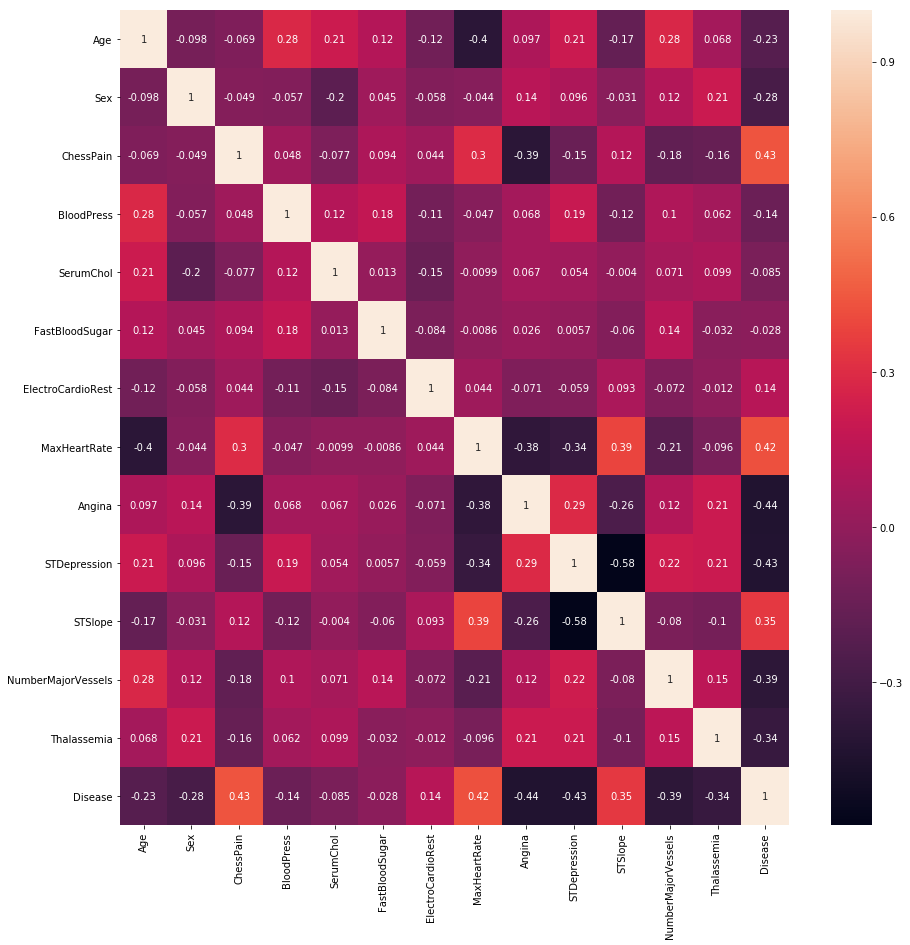

In [7]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
sns.heatmap(data=dataset.corr(), annot=True, ax=ax)

Text(0, 0.5, 'Count')

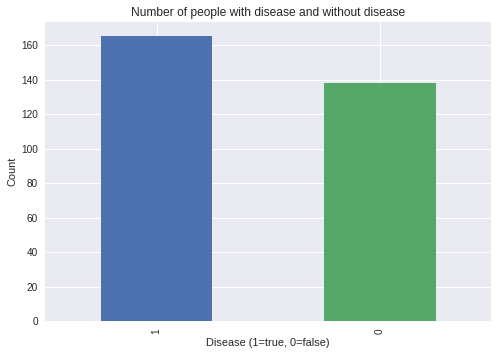

In [128]:
disease_count = dataset["Disease"].value_counts()

fig, ax = plt.subplots(1, 1)
disease_count.plot.bar(ax=ax)
ax.set_title("Number of people with disease and without disease")
ax.set_xlabel("Disease (1=true, 0=false)")
ax.set_ylabel("Count")

## Age

Text(0, 0.5, 'Age')

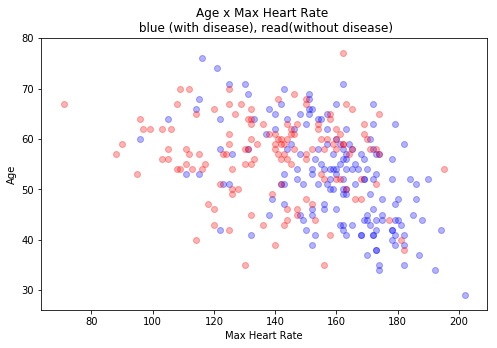

In [62]:
# Age x MaxHeartRate

fig, ax = plt.subplots(1,1, figsize=(8,5))

colors = ['r', 'b']

for index, label in enumerate(dataset["Disease"]):
    ax.scatter(dataset["MaxHeartRate"][index], dataset["Age"][index], color=colors[label], alpha=0.3)
ax.set_title("Age x Max Heart Rate \n blue (with disease), read(without disease)")
ax.set_xlabel("Max Heart Rate")
ax.set_ylabel("Age")

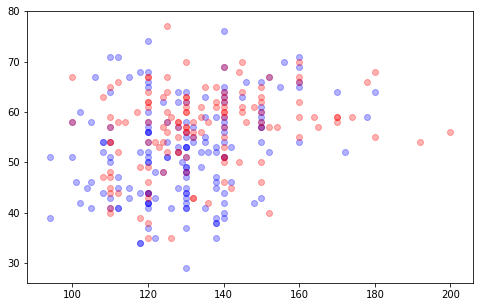

In [76]:
# Age x BloodPress

fig, ax = plt.subplots(1,1, figsize=(8, 5))

colors = ['r', 'b']

for index, label in enumerate(dataset["Disease"]):
    ax.scatter(dataset["BloodPress"][index], dataset["Age"][index], color=colors[label], alpha=0.3)

In [78]:
with_disease = dataset[dataset["Disease"] == 1]
without_disease = dataset[dataset["Disease"] == 0]

Text(0, 0.5, 'Density')

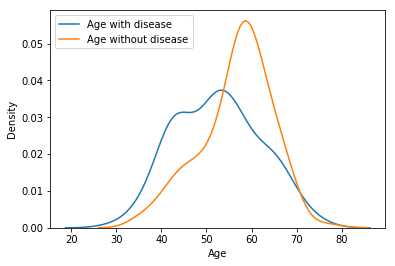

In [79]:
fig, ax = plt.subplots(1, 1)

sns.kdeplot(with_disease["Age"], ax=ax, label="Age with disease")
sns.kdeplot(without_disease["Age"], ax=ax, label="Age without disease")
ax.set_xlabel("Age")
ax.set_ylabel("Density")

In [103]:
pd.cut(dataset["Age"], 4, labels=False, retbins=True)[1]

array([28.952, 41.   , 53.   , 65.   , 77.   ])

[Text(0, 0, '28 - 41'),
 Text(0, 0, '41 - 53'),
 Text(0, 0, '53 - 65'),
 Text(0, 0, '65 - 77')]

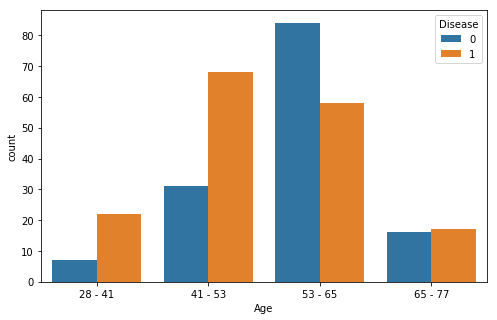

In [119]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

age_bins = pd.cut(dataset["Age"], 4, labels=False, retbins=True)
x_labels = []

for i in range(len(age_bins[1])-1):
        x_labels.append(str(int(age_bins[1][i])) + " - " + str(int(age_bins[1][i+1])))


sns.countplot(x=age_bins[0], hue=dataset["Disease"], ax=ax)

ax.set_xticklabels(x_labels)

## BloodPress

Text(0, 0.5, 'Density')

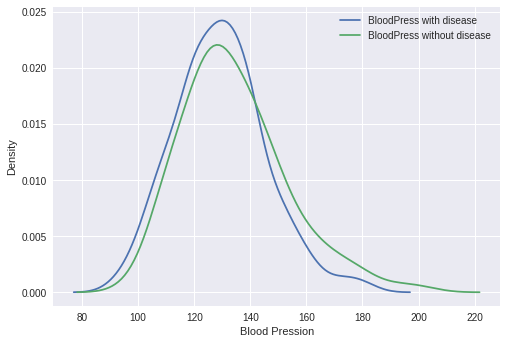

In [129]:
fig, ax = plt.subplots(1, 1)

sns.kdeplot(with_disease["BloodPress"], ax=ax, label="BloodPress with disease")
sns.kdeplot(without_disease["BloodPress"], ax=ax, label="BloodPress without disease")
ax.set_xlabel("Blood Pression")
ax.set_ylabel("Density")

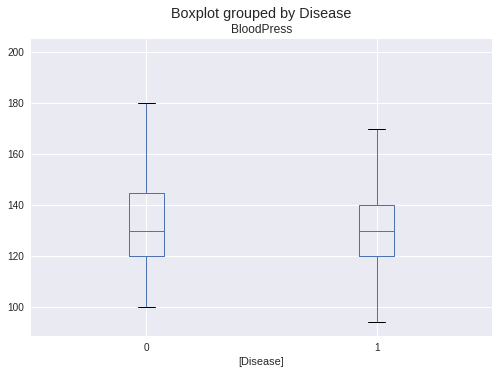

In [130]:
dataset[["BloodPress", "Disease"]].boxplot(by="Disease")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


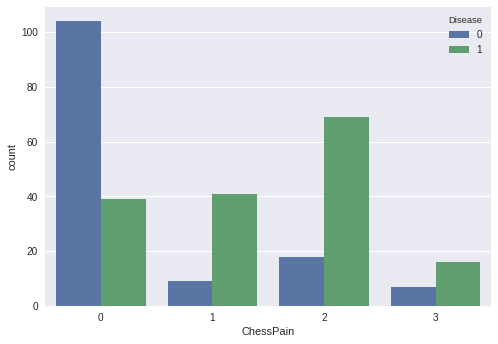

In [131]:
sns.countplot(data=dataset, x="ChessPain", hue="Disease")



---


## Sex attribute
Na descrição do dataset no kaggle não tem dizendo quais dos sexos (masculino, feminino) são represetados pelos números (0 - 1), porém ao análisar como o dataset tá distribuido é muito mais provavel que o 0 seja o masculino e o 1 seja o feminino, por conta da cultura de mulheres tenderem a procurar mais médicos que os homens, tendo consequentemente menos doenças.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


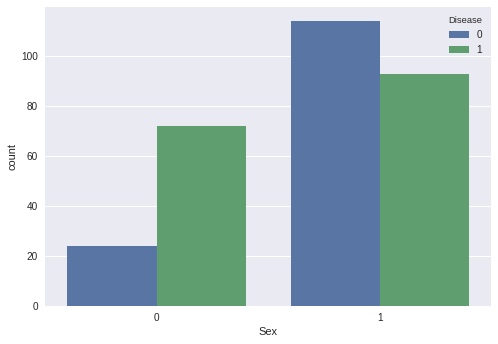

In [132]:
sns.countplot(data=dataset, x="Sex", hue="Disease")



---

## Serum Cholesterol attribute

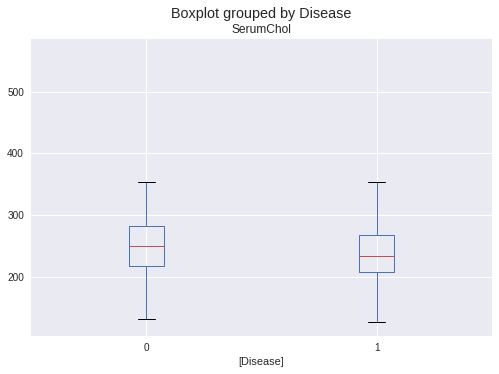

In [133]:
dataset[["SerumChol", "Disease"]].boxplot(by="Disease")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


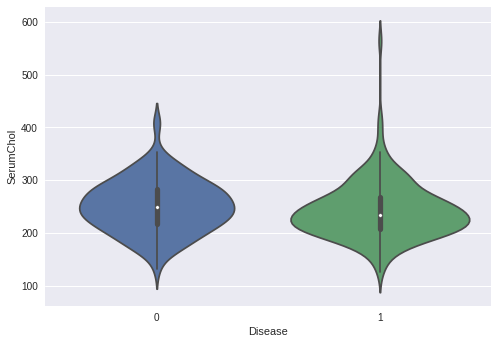

In [134]:
sns.violinplot(x="Disease", y="SerumChol", data=dataset)

Text(0, 0.5, 'Density')

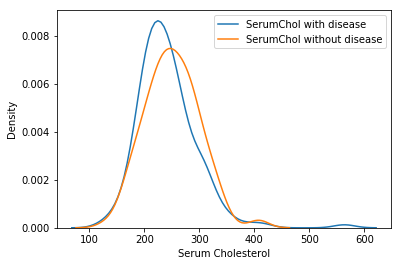

In [27]:
with_disease = dataset[dataset["Disease"] == 1]
without_disease = dataset[dataset["Disease"] == 0]

fig, ax = plt.subplots(1, 1)

sns.kdeplot(with_disease["SerumChol"], ax=ax, label="SerumChol with disease")
sns.kdeplot(without_disease["SerumChol"], ax=ax, label="SerumChol without disease")
ax.set_xlabel("Serum Cholesterol")
ax.set_ylabel("Density")

## Fast blood sugar

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


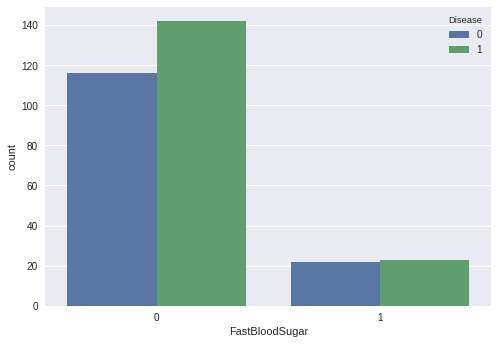

In [136]:
sns.countplot(data=dataset, x="FastBloodSugar", hue="Disease")

## Rest Electro Cardiograma Result

In [137]:
dataset["ElectroCardioRest"].value_counts()

1    152
0    147
2      4
Name: ElectroCardioRest, dtype: int64

## MaxHeartRate

In [138]:
dataset["MaxHeartRateDiscrete"] = pd.cut(dataset["MaxHeartRate"], 4, labels=False)
dataset["MaxHeartRateDiscrete"].value_counts()

2    161
1     69
3     63
0     10
Name: MaxHeartRateDiscrete, dtype: int64

In [142]:
dataset[["MaxHeartRate", "MaxHeartRateDiscrete"]].tail()

,MaxHeartRate,MaxHeartRateDiscrete
298,123,1
299,132,1
300,141,2
301,115,1
302,174,3


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


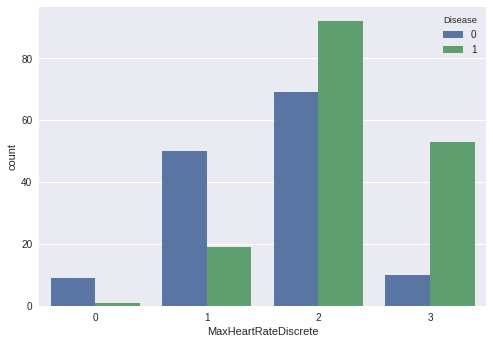

In [140]:
sns.countplot(data=dataset, x="MaxHeartRateDiscrete", hue="Disease")

## Argina

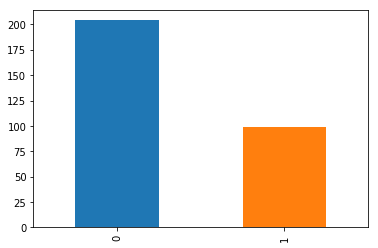

In [50]:
a_count = dataset["Angina"].value_counts()
a_count.plot.bar()

Text(0, 0.5, 'Density')

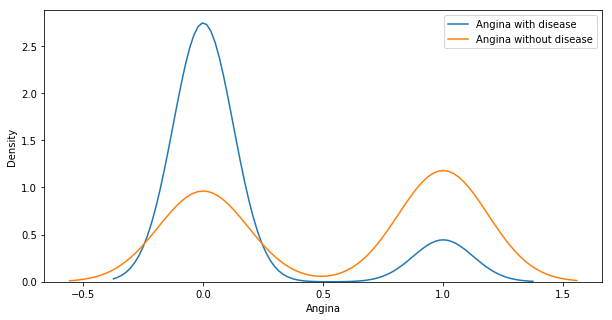

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

sns.kdeplot(with_disease["Angina"], ax=ax, label="Angina with disease")
sns.kdeplot(without_disease["Angina"], ax=ax, label="Angina without disease")
ax.set_xlabel("Angina")
ax.set_ylabel("Density")

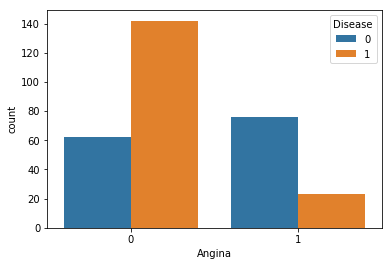

In [52]:
sns.countplot(data=dataset, x="Angina", hue="Disease")

## STDepression x STSlope

Text(0, 0.5, 'Density')

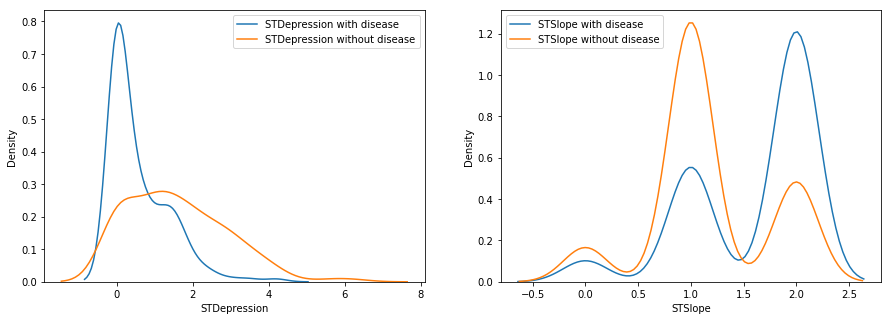

In [33]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))

sns.kdeplot(with_disease["STDepression"], ax=ax1, label="STDepression with disease")
sns.kdeplot(without_disease["STDepression"], ax=ax1, label="STDepression without disease")
ax1.set_xlabel("STDepression")
ax1.set_ylabel("Density")

sns.kdeplot(with_disease["STSlope"], ax=ax2, label="STSlope with disease")
sns.kdeplot(without_disease["STSlope"], ax=ax2, label="STSlope without disease")
ax2.set_xlabel("STSlope")
ax2.set_ylabel("Density")

## NumberMajorVessels

In [40]:
dataset["NumberMajorVessels"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: NumberMajorVessels, dtype: int64

Text(0, 0.5, 'Density')

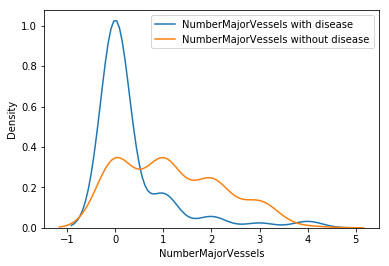

In [43]:
fig, ax = plt.subplots(1,1)

sns.kdeplot(with_disease["NumberMajorVessels"], ax=ax, label="NumberMajorVessels with disease")
sns.kdeplot(without_disease["NumberMajorVessels"], ax=ax, label="NumberMajorVessels without disease")
ax.set_xlabel("NumberMajorVessels")
ax.set_ylabel("Density")

## Thalassemia

In [44]:
dataset["Thalassemia"].value_counts()

2    166
3    117
1     18
0      2
Name: Thalassemia, dtype: int64

Text(0, 0.5, 'Density')

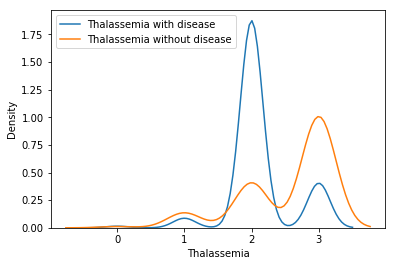

In [45]:
fig, ax = plt.subplots(1,1)

sns.kdeplot(with_disease["Thalassemia"], ax=ax, label="Thalassemia with disease")
sns.kdeplot(without_disease["Thalassemia"], ax=ax, label="Thalassemia without disease")
ax.set_xlabel("Thalassemia")
ax.set_ylabel("Density")